# Assignment 3

## 1. Project Background 

### 1a. Visualization Background
The following dataset will be visually analyzed to investigate the relationship between access to basic resources (internet, vehicle, kitchen) and food insecurity rates across counties in Florida.

We will be:
* Exploring the socioeconomic factors influencing food insecurity

Target Stakeholders: 
* Aid NGOs in allocating appropriate resources to high risk counties
* Understand how important basic resoursces are and how they might drive risk in food security

Methodology:
* Utilize scatterplots, histograms, line graph and heatmap to visualize relationships between access variables and food insecurity rates
* The flow of the dashboard (histograms, scatterplots, and heatmaps) delineates the story behind the data.
1) Starting with histograms, we aim to understand the distribution of the data as a whole and the distribution of individual variable. This will allow us to understand the skewness, identify patterns, outliers, and the overall distribution of data.
2) We will then look at the each variable distribution against food insecurity rate and examine the pairwise relationships, delineating patterns, dispersness and dispariites.
3) A violin plot will be used to compare distributions of our variables across groups to assess the outliers, density, patterns, and spread of the data.
4) Lastly, we will utilize a correlation heatmap to examine the multivariate patterns. This will aid in quantifying the linear relationships between variables, predictors for regression or modeling, and detect redundancy.


### 1b. Visualization Library
For the following dashboard, we will be utilizing histograms, scatter plots, and a heat map to understand the relationship between the three variables. 
The libraries we will be using is:

* Pandas - data manipulation and data processing
* Seaborn - data visualization library
* Numpy - numerical computing library
* Statsmodel - statistical modeling and inference

For our data dashboard we will be using Seaborn as the main visualization library. Seaborn is an open-source library in Python, built ontop of Matplotlib. It is commonly used in Data Science community for it's seamless and intuitive process as well as it's aesthetical. Seaborn was created by a Neuroscientist at Prinston, Michael Waskom. Fun fact about Seaborn, the library was named after a character (Captain Seaborn) from The Rime of the Ancient Mariner by Samuel Taylor Coleridge! 

Seaborn was choosen as they have great selections that can visualize the relationships between multiple variables (statistical relationships). You can check out the Seaborn documentation page here: https://seaborn.pydata.org/

Installation Process: 

*Jupyter Notebook:*
1) Install Pip:
   * From Python Terminal: _pip install seaborn_
   * From Jupyter Notebook: _!pip install seaborn_
   * From Anaconda: _conda install seaborn_
2) Once pip step has been complete, you can then import the library as: _import seaborn as sns_

**Interactive Library**

The two primary interactive libraries used is plotly and ipywidgets. Both libraries are open source and utilized for interactive displays. Plotly offers a variety of visualization tools such as scatter, violin, heatmap, and histograms. Ipywidget is maintained by Jupyter Notebook and provides the dynanics of the dashboard. 

Libraries used:
plotly.graph_objects as go - Builds detailed charts 
ipywidgets as widgets - Creates common charts with less code
plotly.express as px - Combines multiple charts into one layout
plotly.subplots import make_subplots- Adds interactivity (sliders, dropdowns, etc)
IPython.display import display - Displays widgets or outputs in notebook cells
IPython.display import clear_output - Clears old charts when updating interactively

Jupyter Notebook Installation:
* Type into an empty cell for the plotly library: _!pip install plotly_
* After installing, you can import the library: import plotly.graph_objects as go, import plotly.express as px, from plotly.subplots import make_subplots
  
* Type into an empty cell for the ipywidgets library: _!pip install ipywidgets_
* After installing, you can import the library: import ipywidgets as widgets


## 2. Exploration of Dataset: Food Insecurity Risk Model

### 2a. Data Collection Process

Selecting the data
With over 67 counties in Florida, many residents come from various socioeconomical backgrounds. This project aims to evaluate how resources like access to the internet, a vehicle, kitchen may affect food security. 4 datasets have been selected to analyze the food access crisis in Florida.

* "Map the Meal Gap" Data by Feeding America - delineates data on impacted people/children, racial and ethnic identities, % of people who are food insecure and unlikely to quality for federal assistance, and money required to buy just enough food
* American Community Survey: delineates data on internet access, vehicle access, and kitchen access

##### Data Collection Process:

There are two ways to collect the data used in this lab. 
1) **Kaggle**
For ease of use, you may download the files from ACS and and Feeding America here: **https://www.kaggle.com/datasets/seemaguruvadoo/food-insecurity-in-florida/data**

2) **Directly from the source**
* Feeding America - Map the Meal Gap
  1) Visit Map the Meal Gap data request page or research section: https://www.feedingamerica.org/research/map-the-meal-gap
  2) Select the button 'Map the Meal Gap Dataset Request Form'
  3) Submit the form
  4) You will recieve an email  within 1-3 days. Once recieved, download the 2019 to 2022 dataset
     
* American Community Survey
  1) Go to https://data.census.gov/
  2) Type the ACS table IDs for each variable in the search bar (Internet Access: B28002, Vehicle Availability: B08201, Kitchen Facilities: B25051)
  3) For each variable:
  4) Click the relevant table
  5) On the top right, use the "Year" filter to select 2019
  6) Use "Geography" filter to select "County" or "State"
  7) Click Download --> CSV file



### 2b. Data Cleaning

In [1]:
# Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import plotly.graph_objects as go
import ipywidgets as widgets
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import display
from IPython.display import clear_output

In [2]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [3]:
# Load Data Files
vehicle_df = pd.read_csv('assignment3_data/ACSDT1Y2019.B08201-Data.csv', encoding='latin1') # ACS vehicle data
kitchen_df = pd.read_csv('assignment3_data/ACSDT1Y2019.B25051-Data.csv', encoding='latin1') # ACS kitchen data
internet_df = pd.read_csv('assignment3_data/ACSDT1Y2019.B28002-Data.csv', encoding='latin1') # ACS internet data
feedAmerica_df = pd.read_csv('assignment3_data/FeedAmerica2019-2022.csv', encoding='latin1') # Feed America

In [4]:
# Clean and merge datasets

## CLEANING DATA
# Feed America - Food Insecurity Data

# Select relevant columns
feedAmerica_df_sub = feedAmerica_df[["County, State", "State", "Year", "Overall Food Insecurity Rate"]] 

# Drop NAs
feedAmerica_df_sub = feedAmerica_df_sub.dropna()

# Filter year to 2019
feedAmerica_df_sub = feedAmerica_df_sub[(feedAmerica_df_sub['Year'] == 2019) & (feedAmerica_df_sub['State'] == "FL" )]

# Split feedAmerica data - County, State - by ","
feedAmerica_df_sub[['County', 'State']] = feedAmerica_df_sub['County, State'].str.split(',', expand=True) 
feedAmerica_df_sub = feedAmerica_df_sub.drop('County, State', axis = 1)

# Strip % from Food Insecurity Rate
feedAmerica_df_sub['Food Insecurity Rate'] = feedAmerica_df_sub['Overall Food Insecurity Rate'].str.rstrip('%').astype(float)

feedAmerica_df_sub = feedAmerica_df_sub.iloc[:, [3, 4]] # Reorganize columns for ease of visualization

feedAmerica_df_sub.head(5)


,County,Food Insecurity Rate
1284,Alachua County,13.4
1288,Baker County,12.2
1292,Bay County,15.0
1296,Bradford County,16.4
1300,Brevard County,12.0


In [5]:
# ACS Data - Vehicle Access

# Select relevant columns
vehicle_df_sub = vehicle_df[["NAME", "B08201_001E", "B08201_002E", "B08201_003E"]] 
                            # NAME - Geographic Area Name
                            # B08201_001E - Population
                            # B08201_002E - No vehicle available 
                            # B08201_003E - Has one vehicle

# Drop NAs
vehicle_df_sub = vehicle_df_sub.dropna()

# Split county data - County, State - by ","
vehicle_df_sub[['County', 'State']] = vehicle_df_sub['NAME'].str.split(',', expand=True) 
vehicle_df_sub = vehicle_df_sub.drop(['NAME', 'State'], axis = 1) # Drop NAME and State column as all data is looking at FL data
vehicle_df_sub = vehicle_df_sub.iloc[2:] # Omit first two rows since it's just informative (not actual data)

# Rename columns
vehicle_df_sub = vehicle_df_sub.rename(columns={'B08201_001E': 'County Population', 'B08201_002E': 'No vehicle available', 'B08201_003E': 'Has one vehicle'})

# Normalized Data
vehicle_df_sub[['County Population', 'Has one vehicle', 'No vehicle available']] = vehicle_df_sub[['County Population', 'Has one vehicle', 'No vehicle available']].astype(int)
vehicle_df_sub['Has one vehicle (%)'] = vehicle_df_sub['Has one vehicle'] / vehicle_df_sub['County Population'] * 100
vehicle_df_sub['No vehicle available (%)'] = vehicle_df_sub['No vehicle available'] / vehicle_df_sub['County Population'] * 100

vehicle_df_sub = vehicle_df_sub.iloc[:, [3, 4, 5]] # Reorganize columns for ease of visualization

# Merge Data
df_all = pd.merge(feedAmerica_df_sub, vehicle_df_sub, on='County', how='left')

vehicle_df_sub.head(5)

,County,Has one vehicle (%),No vehicle available (%)
2,Alachua County,40.588601,7.753533
3,Bay County,33.417154,3.826866
4,Brevard County,38.955326,4.207040
5,Broward County,39.174482,7.732695
6,Charlotte County,41.239604,6.339030


Please note that the 'Vehicle' dataset includes columns for ownership of more than one vehicle. For this study, I chose to focus specifically on the clear distinction between having a car and not having a car.

In [6]:
## CLEANING DATA
# ACS Data - Kitchen

# Select relevant columns
kitchen_df_sub = kitchen_df[["NAME", "B25051_001E", "B25051_003E", "B25051_002E"]] 
                            # NAME - Geographic Area Name
                            # B25051_001E	- population
                            # B25051_003E - Lacking kitchen available
                            # B25051_002E	- Complete kitchen facility

# Drop NAs
kitchen_df_sub = kitchen_df_sub.dropna()

# Split county data - County, State - by ","
kitchen_df_sub[['County', 'State']] = kitchen_df_sub['NAME'].str.split(',', expand=True) 
kitchen_df_sub = kitchen_df_sub.drop(['NAME', 'State'], axis = 1) # Drop NAME and State column as all data is looking at FL data
kitchen_df_sub = kitchen_df_sub.iloc[2:] # Omit first two rows since it's just informative (not actual data)

# Rename columns
kitchen_df_sub = kitchen_df_sub.rename(columns={'B25051_001E': 'County Population', 'B25051_003E': 'Lacking kitchen available', 'B25051_002E': 'Complete kitchen facility'})

# Normalized Data
kitchen_df_sub[['County Population', 'Complete kitchen facility', 'Lacking kitchen available']] = kitchen_df_sub[['County Population', 'Complete kitchen facility', 'Lacking kitchen available']].astype(int)
kitchen_df_sub['Complete kitchen facility (%)'] = kitchen_df_sub['Complete kitchen facility'] / kitchen_df_sub['County Population'] * 100
kitchen_df_sub['Lacking kitchen available (%)'] = kitchen_df_sub['Lacking kitchen available'] / kitchen_df_sub['County Population'] * 100

kitchen_df_sub = kitchen_df_sub.iloc[:, [3, 4, 5]] # Reorganize columns for ease of visualization

# Merge Data
df_all = pd.merge(df_all, kitchen_df_sub, on='County', how='left')

kitchen_df_sub.head(5)

,County,Complete kitchen facility (%),Lacking kitchen available (%)
2,Alachua County,97.950527,2.049473
3,Bay County,94.899011,5.100989
4,Brevard County,98.814129,1.185871
5,Broward County,99.113896,0.886104
6,Charlotte County,99.226130,0.773870


In [7]:
## CLEANING DATA
# ACS Data - Kitchen

# Select relevant columns
internet_df_sub = internet_df[["NAME", "B28002_001E", "B28002_013E", "B28002_002E"]]
                            # NAME - Geographic Area Name
                            # B28002_001E - population
                            # B28002_013E - No internet subscription
                            # B28002_002E - with internet subscription
# Drop NAs
internet_df_sub = internet_df_sub.dropna()

# Split county data - County, State - by ","
internet_df_sub[['County', 'State']] = internet_df_sub['NAME'].str.split(',', expand=True) 
internet_df_sub = internet_df_sub.drop(['NAME', 'State'], axis = 1) # Drop NAME and State column as all data is looking at FL data
internet_df_sub = internet_df_sub.iloc[2:] # Omit first two rows since it's just informative (not actual data)

# Rename columns
internet_df_sub = internet_df_sub.rename(columns={'B28002_001E': 'County Population', 'B28002_013E': 'No internet subscription', 'B28002_002E': 'With internet subscription'})

# Normalized Data
internet_df_sub[['County Population', 'With internet subscription', 'No internet subscription']] = internet_df_sub[['County Population', 'With internet subscription', 'No internet subscription']].astype(int)
internet_df_sub['With internet subscription (%)'] = internet_df_sub['With internet subscription'] / internet_df_sub['County Population'] * 100
internet_df_sub['No internet subscription (%)'] = internet_df_sub['No internet subscription'] / internet_df_sub['County Population'] * 100

internet_df_sub = internet_df_sub.iloc[:, [3, 4, 5]] # Reorganize columns for ease of visualization

# Merge Data
df_all = pd.merge(df_all, internet_df_sub, on='County', how='left')

internet_df_sub.head(5)

,County,With internet subscription (%),No internet subscription (%)
2,Alachua County,88.369700,8.190325
3,Bay County,88.828673,9.413975
4,Brevard County,90.050990,8.063275
5,Broward County,88.192444,9.058900
6,Charlotte County,88.046586,10.159422


In [8]:
# MERGE DATAFRAMES --> FINAL OUTPUT

df_clean = df_all.dropna().reset_index(drop=True) # Drop all NaN and reindex dataset
df_clean.head(5)

# df_clean[['County', 'Food Insecurity Rate', 'No internet subscription (%)']].head(20)

,County,Food Insecurity Rate,Has one vehicle (%),No vehicle available (%),Complete kitchen facility (%),Lacking kitchen available (%),With internet subscription (%),No internet subscription (%)
0,Alachua County,13.4,40.588601,7.753533,97.950527,2.049473,88.369700,8.190325
1,Bay County,15.0,33.417154,3.826866,94.899011,5.100989,88.828673,9.413975
2,Brevard County,12.0,38.955326,4.207040,98.814129,1.185871,90.050990,8.063275
3,Broward County,9.9,39.174482,7.732695,99.113896,0.886104,88.192444,9.058900
4,Charlotte County,13.5,41.239604,6.339030,99.226130,0.773870,88.046586,10.159422


### 2C. Exploring the Data

In [9]:
# Understand the data distribution
df_clean.describe()

,Food Insecurity Rate,Has one vehicle (%),No vehicle available (%),Complete kitchen facility (%),Lacking kitchen available (%),With internet subscription (%),No internet subscription (%)
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,12.260976,38.430012,5.254804,98.375947,1.624053,87.376331,9.826955
std,1.613982,5.748259,1.820934,1.236979,1.236979,3.624489,3.060778
min,9.400000,24.870371,1.943145,93.177395,0.193963,76.358402,4.605966
25%,11.200000,36.230672,4.207040,97.950527,0.929434,85.495623,7.868999
50%,11.900000,39.174482,5.008689,98.686845,1.313155,88.152202,9.065740
75%,13.200000,40.869023,6.051967,99.070566,2.049473,89.495106,10.791646
max,16.700000,60.333345,10.691556,99.806037,6.822605,93.893895,19.468986


# Interactive Dashboard:

In [10]:
df_violin = pd.DataFrame({'Food Insecurity Rate': pd.concat([df_clean['Food Insecurity Rate'], df_clean['Food Insecurity Rate'], df_clean['Food Insecurity Rate']], ignore_index=True), 'Access Type': ['No Internet (%)'] * len(df_clean) +['No Kitchen (%)'] * len(df_clean) +['No Vehicle (%)'] * len(df_clean),'Access Level (%)': pd.concat([df_clean['No internet subscription (%)'],df_clean['Lacking kitchen available (%)'],df_clean['No vehicle available (%)']], ignore_index=True)})

def dashboard(f):
    clear_output(wait=True)

    # Filter data based on selected food insecurity range
    filtered = df_clean[
        (df_clean["Food Insecurity Rate"] >= f[0]) & (df_clean["Food Insecurity Rate"] <= f[1])]

    filtered_violin = df_violin[df_violin["Food Insecurity Rate"].between(f[0], f[1])    ]

    # Histogram
    fig1 = px.histogram(filtered, x="Food Insecurity Rate", nbins=10, marginal="rug",
                        title="Food Insecurity Rate Distribution")

    # Violin Plot
    fig2 = px.violin(filtered_violin, x='Access Type', y='Food Insecurity Rate', color='Access Type', box=True, points='all', title='Food Insecurity by Access Limitation Type')

    # Scatter Plot Grid
    scatter_cols = [
            ("No internet subscription (%)", "No Internet Access"),
            ("No vehicle available (%)", "No Vehicle Access"),
            ("Lacking kitchen available (%)", "No Kitchen Access")
        ]
    fig4 = make_subplots(rows=1, cols=3, subplot_titles=[label for _, label in scatter_cols])
    for i, (col, label) in enumerate(scatter_cols):
        fig4.add_trace(
            go.Scatter(
                x=filtered[col],
                y=filtered["Food Insecurity Rate"],
                mode='markers',
                name=label,
                text=filtered['County'],
                marker=dict(size=10)
            ),
            row=1, col=i+1
        )
    fig4.update_layout(height=400, width=1200, title_text="Lack of Access vs Food Insecurity Rate")

        # Correlation Matrix
    if len(filtered) > 1:
        corr = filtered.drop(columns=['County']).corr()
        fig3 = go.Figure(data=go.Heatmap(
            z=corr.values,
            x=corr.columns,
            y=corr.columns,
            colorscale='RdBu',
            zmin=-1,
            zmax=1,
            colorbar_title="Correlation"
        ))
        fig3.update_layout(title="Correlation Matrix")
    else:
        fig3 = go.Figure()
        fig3.update_layout(title="Not enough data for correlation matrix")
        
    fig1.show()
    fig2.show()
    fig4.show()
    fig3.show()

# Food Insecurity Slider
slide = widgets.FloatRangeSlider(
    value=[10.0, 15.0],
    min=5.0,
    max=20.0,
    step=0.5,
    description='Filter: Food Insecurity Rate',
    continuous_update=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='90%')
)

widgets.interact(dashboard, f=slide)

interactive(children=(FloatRangeSlider(value=(10.0, 15.0), continuous_update=False, description='Filter: Food …

<function __main__.dashboard(f)>

# Git Repository

# Seaborn Plot:

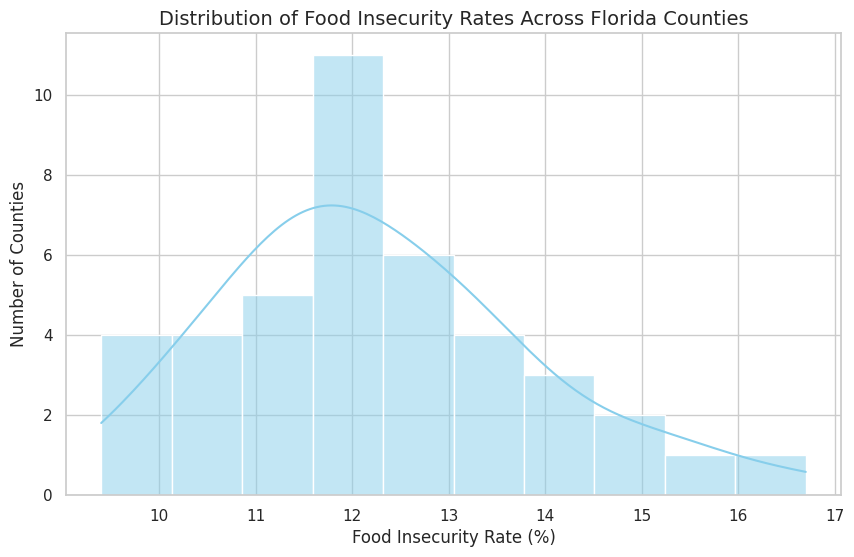

In [16]:
# Exploring the distribution of Food Insecurity Rate across Florida counties

# Set the plot style
sns.set(style="whitegrid")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Food Insecurity Rate'], bins=10, kde=True, color='skyblue')

# Add labels and title
plt.title('Distribution of Food Insecurity Rates Across Florida Counties', fontsize=14)
plt.xlabel('Food Insecurity Rate (%)')
plt.ylabel('Number of Counties')

# Show the plot
plt.show()

### Wait pause... what does this mean?

Well, most counties fall within the 11% to 13.5% food insecurity range. 

Recall the df_clean.describe() function above. 

We know from the analysis that the food insecurity rate is:  

**Mean: 12.55%**  
**Standard Deviation: 1.45%**  
**Threshold: 14.00%**  

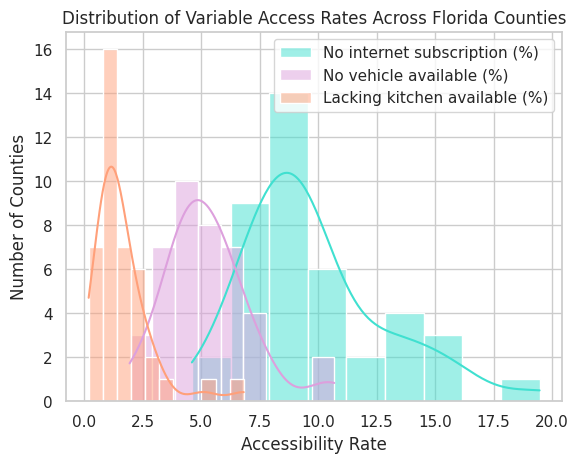

In [17]:
# Histogram analysis of food insecurities distribution across florida counties 

# Plotting overlapping histograms with KDE
sns.histplot(df_clean['No internet subscription (%)'], color='turquoise', alpha=0.5, kde=True, label='No internet subscription (%)')
sns.histplot(df_clean['No vehicle available (%)'], color='plum', alpha=0.5, kde=True, label='No vehicle available (%)')
sns.histplot(df_clean['Lacking kitchen available (%)'], color='lightsalmon', alpha=0.5, kde=True, label='Lacking kitchen available (%)')

# Adding labels and legend
plt.title('Distribution of Variable Access Rates Across Florida Counties')
plt.xlabel('Accessibility Rate')
plt.ylabel('Number of Counties')
plt.legend()

plt.show()

#### **Key Observations**
##### Distribution of Variable Access Rates Across Florida Counties Histogram 
The histogram provides a visual overview of Internet, Vehicle, and Kitchen accessibility across Florida counties.
The goal is to visually assess whether the variables shows patterns that suggest it could be a meaningful predictor of food insecurity.
- **No Internet Subscription**: The distribution is heavily skewed to the left, with the widest spread of data. This impacts a high number of counties, indicating that internet access is an issue in many counties. The data peaks around 7–10%, but stretches to 20% in some counties.
- **No Vehicle**: The distribution is slightly skewed to the left, with the data more varied. This could suggest that this variable might be statistically significant when predicting food insecurity. Around 2.5% to 7.5% of the population lack access to vehicle access.
- **No Kitchen**: The distribution is slightly skewed to the left, with around 0% to 2.5% of the population lacking kitchen access. This suggests that most counties have kitchens and may not impact food insecurity! Great news.

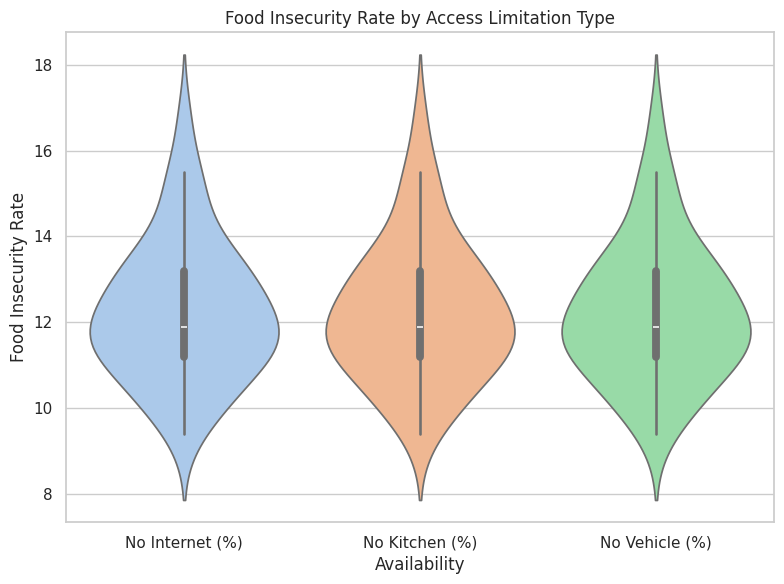

In [40]:
df_violin = pd.DataFrame({'Food Insecurity Rate': pd.concat([df_clean['Food Insecurity Rate'], df_clean['Food Insecurity Rate'], df_clean['Food Insecurity Rate']], ignore_index=True),
    'Access Type': ['No Internet (%)'] * len(df_clean) +
                   ['No Kitchen (%)'] * len(df_clean) +
                   ['No Vehicle (%)'] * len(df_clean),
    'Access Level (%)': pd.concat([df_clean['No internet subscription (%)'], df_clean['Lacking kitchen available (%)'], df_clean['No vehicle available (%)']], ignore_index=True)})

plt.figure(figsize=(8, 6))
sns.violinplot(
    x='Access Type',
    y='Food Insecurity Rate',
    data=df_violin,
    hue='Access Type',
    palette='pastel',
    inner='box',
    legend=False
)

plt.title('Food Insecurity Rate by Access Limitation Type')
plt.xlabel('Availability')
plt.ylabel('Food Insecurity Rate')
plt.tight_layout()
plt.show()

#### **Key Observations:**
##### Violin Plot  
The violin plot provides a visual assessment of the relationship between the accessability of resources in FL counties to food insecurity.  
The goal is to visually assess whether the variables shows a correlation, very much similar to a histogram. However, a histogram is more of a simplistic view. With a violin plot, we will be able to answer questions like which groups have higher median food insecurity, which groups have wider spread or more outliers, is there a systematic shift in food insecurity as access declines, etc. 

Upon analyzing the violin plot above, we can see that the median and skewness for all three variables are roughly the same, with 12% in median and long tails. It can be noted that no internet and no kitchen are slightly wider and have longer tails. No Vehicle is more compact at the begining and end tails, with may suggest that there is less variablity in the data. This chart further verifies our hypothesis, stating that there is a correlation/impact with the socioeconomic factors (especially internet and kitchen access) which may directly affect certain populations or geographies food insecurity rate.

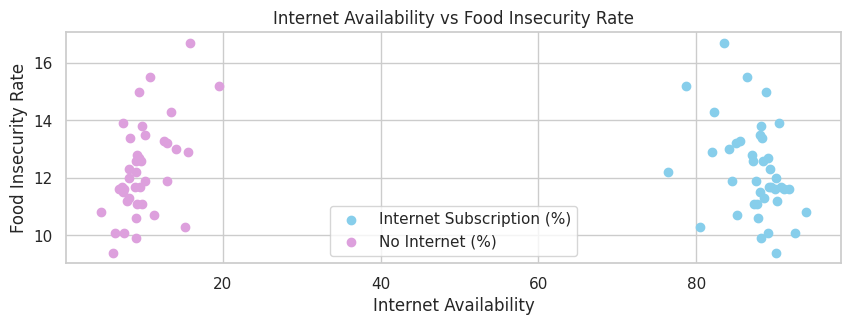

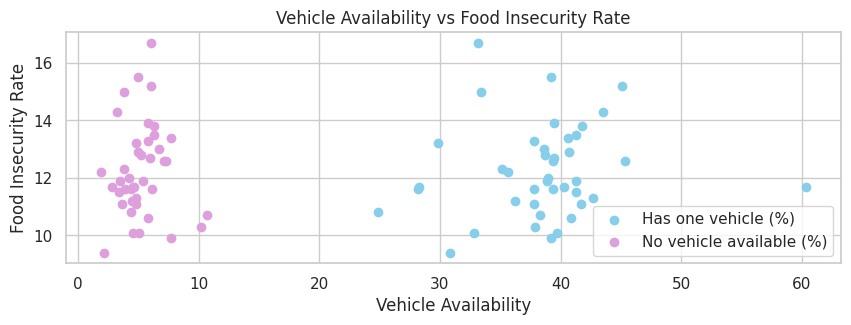

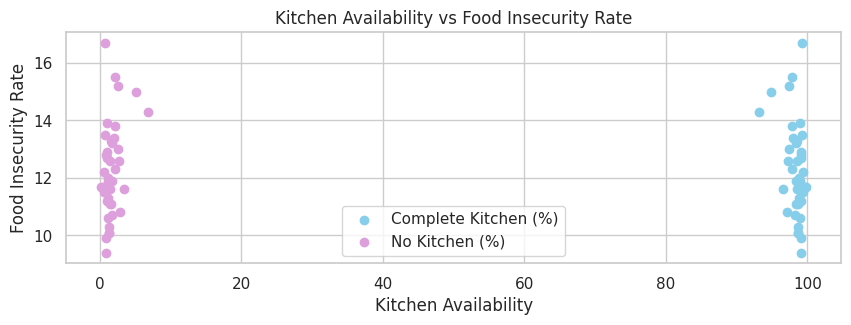

In [11]:
# Vehicle, Internet, and Kitchen access relation to Food Insecurity

# Scatter plot for Food Insecurity Rate vs Has one vehicle (%) and No vehicle available (%)
plt.figure(figsize=(10,3))
plt.scatter(df_clean['With internet subscription (%)'], df_clean['Food Insecurity Rate'], color='skyblue', label='Internet Subscription (%)')
plt.scatter(df_clean['No internet subscription (%)'], df_clean['Food Insecurity Rate'],  color='plum', label='No Internet (%)')
plt.xlabel('Internet Availability')
plt.ylabel('Food Insecurity Rate')
plt.title('Internet Availability vs Food Insecurity Rate')
plt.legend()

plt.figure(figsize=(10,3))
plt.scatter(df_clean['Has one vehicle (%)'], df_clean['Food Insecurity Rate'], color='skyblue', label='Has one vehicle (%)')
plt.scatter(df_clean['No vehicle available (%)'],df_clean['Food Insecurity Rate'], color='plum', label='No vehicle available (%)')
plt.xlabel('Vehicle Availability')
plt.ylabel('Food Insecurity Rate')
plt.title('Vehicle Availability vs Food Insecurity Rate')
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
plt.scatter(df_clean['Complete kitchen facility (%)'], df_clean['Food Insecurity Rate'], color='skyblue', label='Complete Kitchen (%)')
plt.scatter(df_clean['Lacking kitchen available (%)'], df_clean['Food Insecurity Rate'], color='plum', label='No Kitchen (%)')
plt.xlabel('Kitchen Availability')
plt.ylabel('Food Insecurity Rate')
plt.title('Kitchen Availability vs Food Insecurity Rate')
plt.legend()
plt.show()

plt.show()

#### **Key Observations:**
##### Scatter Plot and Regression Analysis  
The scatter plot provides a visual assessment of the relationship between the accessability of resources in FL counties to food insecurity.  
The goal is to visually assess whether the variables shows a correlation.

#### Internet Availability:
- **Observation**: More than 80% of people have internet access, while less than 20% do not. There is a large cluster between 11-14% for both subscription and non-subscription rates.
- **Correlation**: There is a very weak positive correlation between the lack of internet access and food insecurity rate. Higher food insecurity rates show a slight trend towards having a higher percentage of the population without internet access, but this trend is not strong.
- **What does this mean?**: While a large majority of the population has internet access regardless of food insecurity levels, communities with somewhat higher food insecurity rates may also have a slightly larger proportion of individuals without internet access. However, the lack of internet access doesn't appear to be a primary determinant of food insecurity based on this visualization.

#### Vehicle Availability:
- **Observation**: Data points for vehicle availability are more dispersed above 30%, while no vehicle availability has a tighter cluster below 10%. There is a focus of clusters between 11-12%, with dispersion increasing from 12-14% for both sets of data.
- **Correlation**: here is a weak positive correlation between the lack of vehicle access and food insecurity rate. Higher food insecurity rates show a slight tendency towards having a higher percentage of households with no vehicle available, but this relationship isn't very strong.
- **What does this mean?**: Higher food insecurity rates are associated with lower vehicle availability and higher percentages of populations without vehicle access.

#### Kitchen Availability:
- **Observation**: The data for kitchen availability is almost linear, indicating that most people have kitchen facilities. The relationship between kitchen availability and food insecurity rate appears proportional.
- **Correlation**: The correlation between the lack of kitchen facilities and food insecurity rate is weakly positive. While the percentage of households without a kitchen is very low overall, communities with slightly higher food insecurity rates might have a marginally higher (though still very small) percentage of households lacking complete kitchen facilities.
- **What does this mean?**: The presence of a complete kitchen is likely not a significant differentiator or strong predictor of food security in this dataset. While a lack of kitchen might be slightly more prevalent in food-insecure communities, its overall rarity suggests it's not a primary factor driving food insecurity rates.

In [12]:
# Regression Model: Correlation between variables and insecurity rate
import statsmodels.api as sm

X = df_clean[['Has one vehicle (%)', 'No vehicle available (%)', "Complete kitchen facility (%)", "Lacking kitchen available (%)", "With internet subscription (%)", "No internet subscription (%)"]]
y = df_clean['Food Insecurity Rate']

# Add a constant to the model
X = sm.add_constant(X)

# Fit the regression model
reg_model = sm.OLS(y, X).fit()

print(reg_model.summary())

                             OLS Regression Results                             
Dep. Variable:     Food Insecurity Rate   R-squared:                       0.391
Model:                              OLS   Adj. R-squared:                  0.304
Method:                   Least Squares   F-statistic:                     4.489
Date:                  Thu, 17 Jul 2025   Prob (F-statistic):            0.00290
Time:                          21:26:45   Log-Likelihood:                -67.141
No. Observations:                    41   AIC:                             146.3
Df Residuals:                        35   BIC:                             156.6
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

#### **Regression Analysis - Do these resources variable have any relationship with Food Insecurity?**

#### **Key Observations:**

The R-squared (0.391) indicate that ~39.1% of the variance in the "Food Insecurity Rate" can be explained by the independent variables included in our model. However it should be noted that the Adj. R-squared (0.304) delineates that not all of the variables might not be contributing significantly to the explanation of the variance.

Given that we have a low p-value .00290 (below alpha, 0.05), we can conclude that at least one of the independent variables in the model has a statistically significant relationship with the Food Insecurity Rate.

Looking further into the p-value for individual variables, we can answer the following questions.

- **No vehicle available (%):** p-value = 0.231 --> not statistically significant at the 0.05 level
- **Lacking kitchen available (%):** p-value = 0.156 --> not statistically significant at the 0.05 level
- **No internet subscription (%):** p-value = 0.005 --> statistically significant at the 0.05 level

Please note that we are dropping the 'Have Access' for each variable as we explored them simply to see the data in a wholistic view.

#### Exploring Multicollinearity within variables

Now that we have explored the socioeconomic variables to the food insecurity rate, we will determine if there is any variance in our dataset by examining the relationship between the variables.

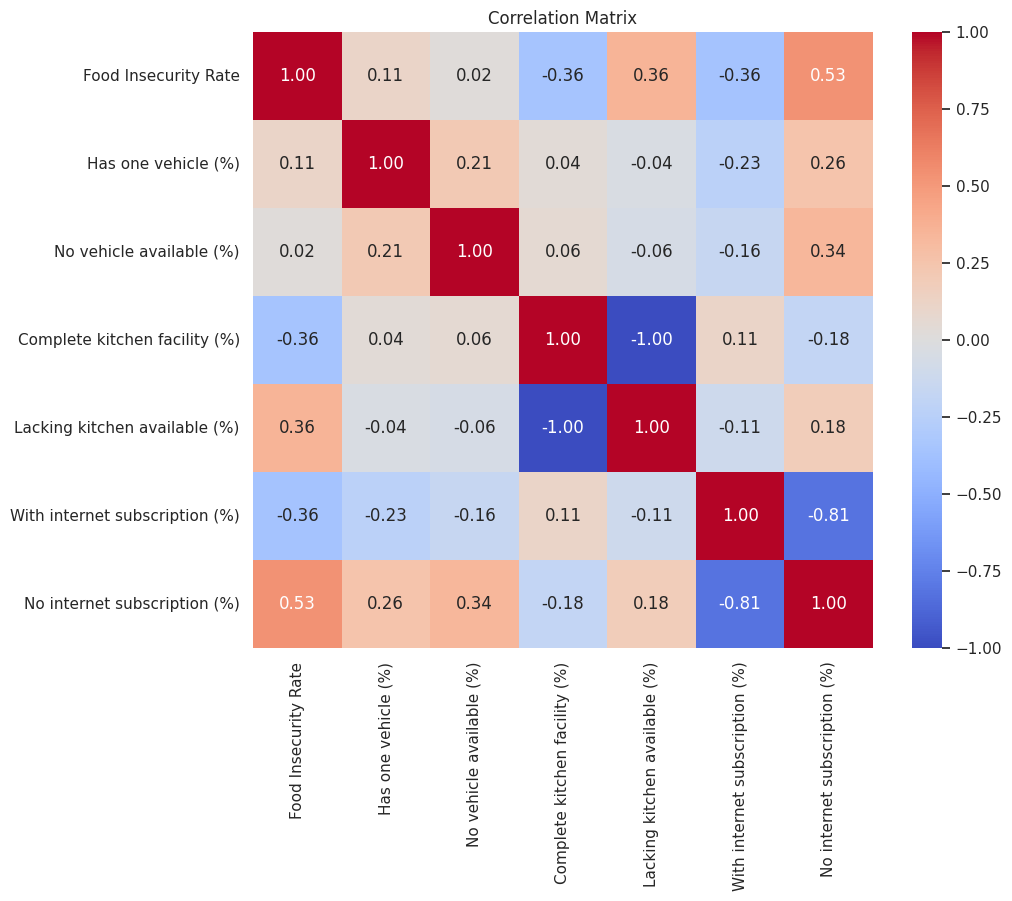

In [13]:
# Create a correlation matrix
corr_matrix = df_clean.drop(columns=['County']).corr()  # Drop County because it's text

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### **Correlation Matrix Observation**

This heatmap represents a correlation matrix which delineates the strength and direction of the linear relationships between food insecurity rates and the variables. 

We can observe the following from this: 
* No Internet Subscription - Areas with less internet access tend to have higher food insecurity (+0.53)

* Lacking Kitchen Availability - Limited kitchen access also aligns with higher food insecurity (+0.36)

* Complete Kitchen Facility and Internet Subscription - Better infrastructure correlates with lower food insecurity (both are -0.36)

What does this tell us? There is a positive relationship between food insecurity rate and limited internet and kitchen access

## 3. Understanding the Dashboard and Usage of Visualization tools & Real World Context

## 3a. Real World Context
The regression analysis, by identifying "No internet subscription (%)" as a statistically significant factor positively associated with the continuous "Food Insecurity Rate," lays the groundwork for practical application by highlighting a key vulnerability. This consistency between identifying a significant association and achieving accurate risk prediction allows for targeted interventions, policy recommendations, resource allocation, and further research into the underlying causes of food insecurity, ultimately enabling data-driven strategies to support vulnerable populations better.

With a starting point/emphasis on internet subscriptions, resources can be allocated there. We can consider the other vehicles and perhaps advocate for more readily available public transport. Though our dataset was small, we can apply it to bigger datasets like all counties in the US.

## 3b. Data Visualization Tools: Limitations

Each method used in the exploratory analysis provides valuable insight but comes with limitations
1) Histogram - Overall view of data, does not indicate how the variables correlate with food insecurity outcomes
2) Violin Plot - Visual clutter and overlapping points can make it hard to detect weak correlations
3) Scatterplots - Assumes a comparable scale for all socioeconomical variables
4) Correlation Matrix - Captures only linear relationships and can miss important nonlinear relationships

It should also be noted that there is not a lot of data within the dataset as the data is only looking at 2019. This may skew the data and visuals. 
A challenge while creating the interactive dashbord was getting the right bins when scrolling to match the display.

## 3b. Whats the Story?
We started our data exploration by examining a histogram of food insecurity rates across Florida counties. It should be noted that most counties fell between [11%, 13.5%], with a mean of 12.55% and a threshold around 14%. This was important as it provided a foundational understanding of the distribution of food insecurity across the state.

We then explored the distribution of each impaired socioeconomical factors. We found that the No Internet Subscription variable showed the widest spread and was heavily left skewed. This indicated that there is a prevelant issue in many counties, peaking around 7–10%. No Vehicle Access was also left skewed but more centered, while Lack of Kitchen Access was extremely low overall. Most counties reporting 0–2.5% which suggested that it may not be a significant barrier for most communities.

To better understand how these variables may impact food insecurity, we used a violin plot. This visual compared the distribution of food insecurity rates for each variable. All three variables had a similar median around 12%, but No Internet and No Kitchen had wider distributions and longer tails. This indicated that there may be a greater variability in the food insecurity in areas with these limitations. This suggested that access to infrastructure may contribute to risk in food security.

Once we understood the data a little better, we started to analyze the relationships between the variable through a scatter plots. We were able to visualize the direct relationships between food insecurity and each variable. A weak positive correlations between lack of internet or vehicle access and higher food insecurity rates was seen. Notably, most counties had high internet access, resulting in a weak correlation with food insecurity. This was also found with vehicle availability. Lack of vehicle access was more concentrated, there was a small indication of higher food insecurity in those areas. Kitchen access, rare as a limitation, showed the least variation and the weakest visual correlation.

Finally, a correlation matrix confirmed these findings. The strongest positive correlation with food insecurity was seen for No Internet Subscription (+0.53), followed by Lacking Kitchen Access (+0.36). Conversely, better infrastructure like Internet Subscription and Complete Kitchen Facilities was negatively correlated with food insecurity (-0.36 each). This reinforced the idea that lack of socioeconomical variables will contribute to food insecurity risk.

# Thank you!!